# CV Problem | MIDAS

## Let's import the libraries required.

In [35]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


## Importing the Data which is in .pkl files

In [2]:
with open('train_image.pkl', 'rb') as f:
    train_images = pickle.load(f)
with open('test_image.pkl', 'rb') as f:
    test_images = pickle.load(f)
with open('train_label.pkl', 'rb') as f:
    train_labels = pickle.load(f)

The data has 4 classes {0,2,3,6}.
<br>
Data from 0 to 1999 are of type 0 <br>
Data from 2000 to 3999 are of type 2<br>
Data from 4000 to 5999 are of type 3<br>
Data from 6000 to 7999 are of type 6<br>


# Let's visualise the data and get some motivation to see what kindof images we need to classify.
## Below we have created a dataframe with 5 images of each type. We will visualise these to get a sense of the data.

In [3]:
class0 = train_images[100:105]
class2 = train_images[2101:2106]
class3 = train_images[4101:4106]
class6 = train_images[6101:6106]
label0 = train_labels[0:5]
label2 = train_labels[2001:2006]
label3 = train_labels[4001:4006]
label6 = train_labels[6001:6006]
p = pd.DataFrame(class0)
p = p.append(class2,ignore_index=True)
p = p.append(class3,ignore_index=True)
p = p.append(class6,ignore_index=True)
labels = label0
labels.extend(label2)
labels.extend(label3)
labels.extend(label6)
p['labels']  = labels


## Code for visualisation using matplotlib

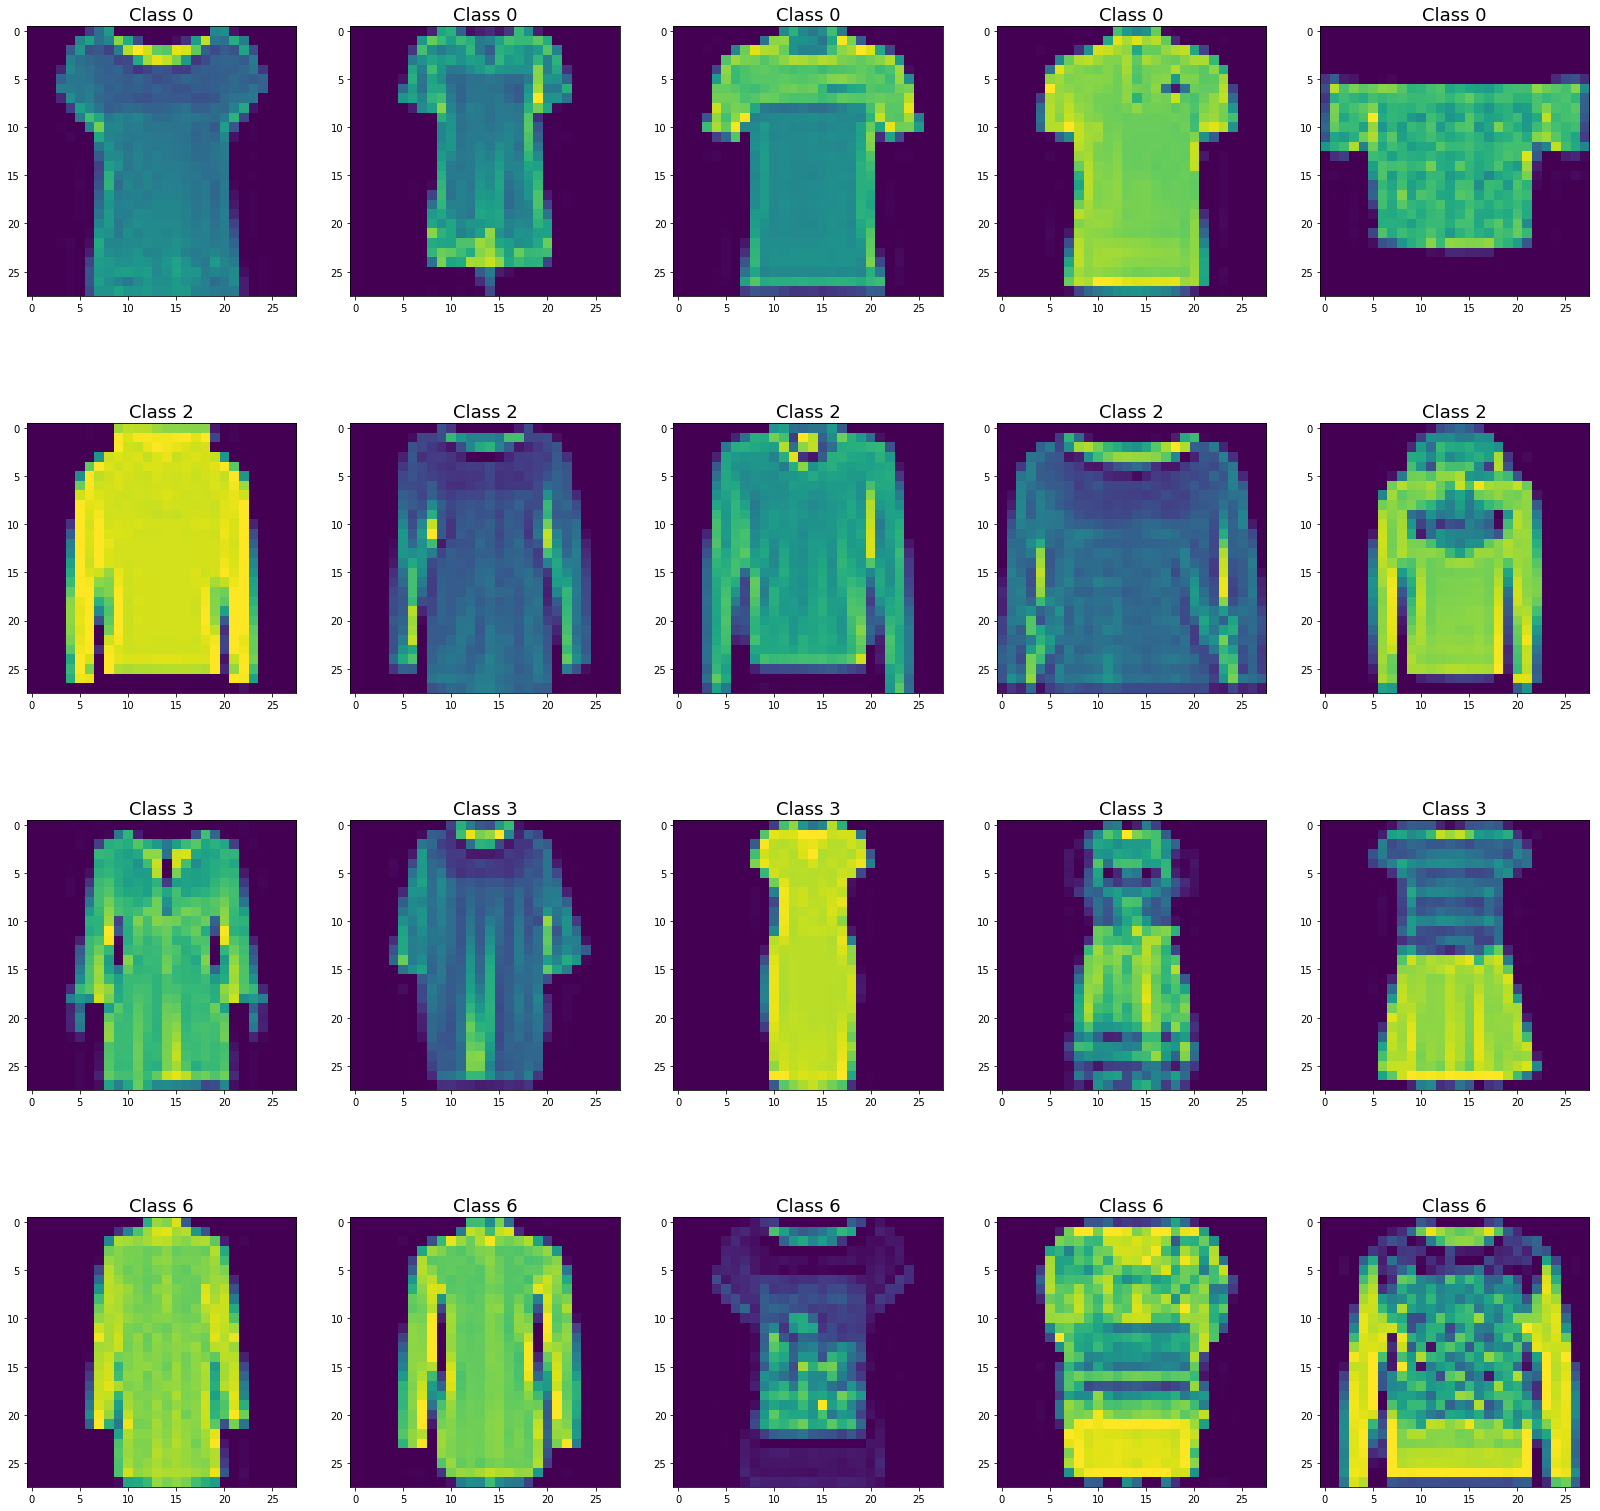

In [4]:
fig = plt.figure(figsize=(28,28))
for i in range(1,21):
    img = np.array(p.iloc[i-1:i,0:784]).reshape(28,28)
    a = fig.add_subplot(4,5,i)
    plt.imshow(img)
    a.set_title("Class " + str(p['labels'][i-1]), fontsize=18)
plt.show()
    

In [11]:
train_labels = pd.DataFrame(train_labels)
a = np.array([np.array(i) for i in train_images])
b = np.array([h.reshape(28,28) for h in a]) #Converting data to array of arrays of size (28,28)

In [12]:
seed = 1234
np.random.seed(seed)


splitting data into training and validation data

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(b,train_labels, test_size = 0.10, random_state = seed) 

In [14]:
train_X = X_train.reshape(X_train.shape[0],1,28,28).astype("float32")  #reshaping the data to feed into  our neural network
test_X = X_val.reshape(X_val.shape[0],1,28,28).astype("float32")
train_X = train_X/255    #Normalizing data to make our network converge faster
test_X = test_X/255
train_Y = to_categorical(Y_train)  #making the categorical e.g. denoting 2 as [0,0,1,0,0,0,0]
test_Y = to_categorical(Y_val)


Defining CNN model. Adding Convolutional layers and Maxpooling.

In [39]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(1,28,28),padding="same",activation="relu",data_format='channels_first'))
model.add(Conv2D(32,(3,3),activation = "relu",data_format='channels_first')) #adding Convolution layer with kernel size 3*3 and 32 filters.

model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_first"))# adding maxpool layer
model.add(Dropout(rate = 0.35)) #droupout to prevent overfitting

model.add(Conv2D(64,(2,2),activation = "relu",data_format='channels_first'))
model.add(Conv2D(64,(2,2),activation = "relu",data_format='channels_first'))

model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_first"))

model.add(Dropout(rate = 0.35))  #Droupout to account for overfitting

model.add(Flatten()) # converts the array into a vector

model.add(Dense(256,activation="relu"))

model.add(Dense(32,activation="relu"))

model.add(Dense(7,activation="softmax"))
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer=optimizer,metrics = ["accuracy"],loss = "categorical_crossentropy")



In [40]:
model.fit(train_X,train_Y, validation_data =  (test_X,test_Y),epochs = 30, batch_size = 108,verbose=2 )

Train on 7200 samples, validate on 800 samples
Epoch 1/30
 - 25s - loss: 0.8947 - acc: 0.6035 - val_loss: 0.6623 - val_acc: 0.7288
Epoch 2/30
 - 24s - loss: 0.6337 - acc: 0.7306 - val_loss: 0.6078 - val_acc: 0.7463
Epoch 3/30
 - 24s - loss: 0.5293 - acc: 0.7901 - val_loss: 0.5647 - val_acc: 0.7975
Epoch 4/30
 - 24s - loss: 0.4738 - acc: 0.8151 - val_loss: 0.4777 - val_acc: 0.8188
Epoch 5/30
 - 24s - loss: 0.4392 - acc: 0.8247 - val_loss: 0.4556 - val_acc: 0.8300
Epoch 6/30
 - 24s - loss: 0.4080 - acc: 0.8339 - val_loss: 0.4289 - val_acc: 0.8350
Epoch 7/30
 - 24s - loss: 0.3879 - acc: 0.8421 - val_loss: 0.4232 - val_acc: 0.8413
Epoch 8/30
 - 24s - loss: 0.3719 - acc: 0.8556 - val_loss: 0.4086 - val_acc: 0.8487
Epoch 9/30
 - 24s - loss: 0.3548 - acc: 0.8586 - val_loss: 0.4633 - val_acc: 0.8275
Epoch 10/30
 - 24s - loss: 0.3361 - acc: 0.8635 - val_loss: 0.3927 - val_acc: 0.8450
Epoch 11/30
 - 24s - loss: 0.3222 - acc: 0.8729 - val_loss: 0.4011 - val_acc: 0.8437
Epoch 12/30
 - 24s - loss: 

## Importing Test Data

In [41]:
with open("test_image.pkl","rb") as f:
    test  = pickle.load(f)
    

In [42]:
test = np.array([np.array(i) for i in test])         #converting into np array
test = np.array([h.reshape(28,28) for h in test])    #setting size to 28*28
test = test.reshape(test.shape[0],1,28,28).astype("float32")  #shaping it to pass it to model
c = model.predict(test)  #predicting
t = np.array([np.argmax(i) for i in c])   #predicting the class
a = [["Test_image_index", "predicted class"]]
j = 0
for i in t:
    c = [j,i]
    a.append(c)
    j+=1
  

In [43]:
with open("Mukul_Kumar.csv",'w') as f:   #writing the prediction of test images onto csv file
    
    writer = csv.writer(f)
    writer.writerows(a)
    